 Searching is the algorithmic process of finding a particular item in a collection of items. A search typically answers either True or False as to whether the item is present. On occasion it may be modified to return where the item is found. For our purposes here, we will simply concern ourselves with the question of membership.

In [5]:
import random

### Sequential Search

When data items are stored in a collection such as a list, we say that they have a linear or sequential relationship. Each data item is stored in a position relative to the others. In Python lists, these relative positions are the index values of the individual items. Since these index values are ordered, it is possible for us to visit them in sequence. This process gives rise to our first searching technique, the sequential search.

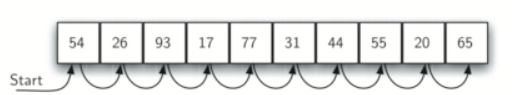

### Analysis of Sequential Search

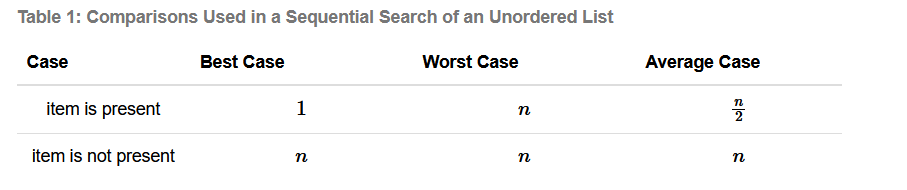

### Binary Search

Search of an item in an ordered list: start comparing with the middle element and then check for the right half or left half of the list

(divide and conquer approach)


In [1]:
def binary_search(numlist, num, starting = 0, len_list = None):
    
    if len_list - starting > 1:
        
        midpoint = starting + (len_list-starting)//2
        
        if numlist[midpoint]  == num:
            print(True)
            return
        
        elif numlist[midpoint] > num:
            binary_search(numlist,num, starting = starting, len_list = midpoint)
        
        else:
            binary_search(numlist,num, starting= midpoint, len_list= len_list)
        
    else:
        print(numlist[0] == num)
        return

In [7]:
def main(num):
    
    test_list = [i for i in range(59)]
    
    lenlist = len(test_list)
    
    binary_search(test_list,num,len_list =  lenlist)

### Hashing

A hash function maps each item into an unique slot in a data structure.

#### Hash Functions

Given a collection of items, a hash function that maps each item into a unique slot is referred to as a perfect hash function. If we know the items and the collection will never change, then it is possible to construct a perfect hash function (refer to the exercises for more about perfect hash functions). Unfortunately, given an arbitrary collection of items, there is no systematic way to construct a perfect hash function. Luckily, we do not need the hash function to be perfect to still gain performance efficiency.

The <b>folding method</b> for constructing hash functions begins by dividing the item into equal-size pieces (the last piece may not be of equal size). These pieces are then added together to give the resulting hash value. For example, if our item was the phone number 436-555-4601, we would take the digits and divide them into groups of 2 (43,65,55,46,01). After the addition,43+65+55+46+01 , we get 210. If we assume our hash table has 11 slots, then we need to perform the extra step of dividing by 11 and keeping the remainder. In this case <b>210 % 11</b> is 1, so the phone number 436-555-4601 hashes to slot 1. Some folding methods go one step further and reverse every other piece before the addition. For the above example, we get <b>43 + 56 + 55 64 + 01 = 219</b> which gives <b>219%11 = 10</b>.

Another numerical technique for constructing a hash function is called the <b>mid-square</b> method. We first square the item, and then extract some portion of the resulting digits. For example, if the item was 44, we would first compute <b> 44² = 1936</b>. By extracting the middle two digits, 93, and performing the remainder step, we get 5 (<b>93%11</b>). Table 5 shows items under both the remainder method and the mid-square method. You should verify that you understand how these values were computed.

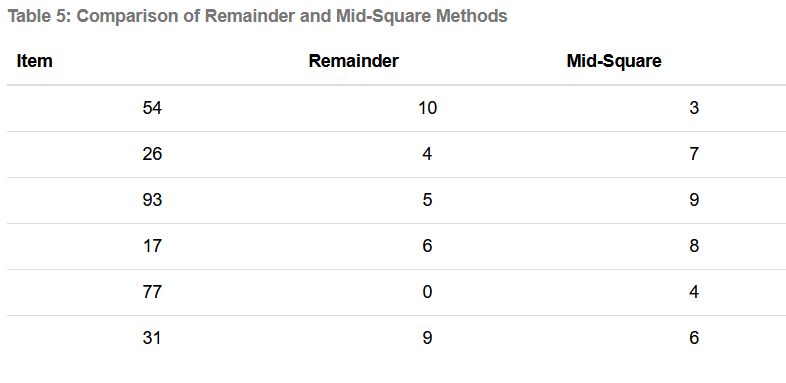

### Collision Resolution

When two items hash to the same slot, we must have a systematic method for placing the second item in the hash table

In [53]:
test = [113 , 117 , 97 , 100 , 114 , 108 , 116 , 105 , 99]

In [54]:
hashtable = [0]*11

In [55]:
for i in test:
    if hashtable[i%11] == 0:
        hashtable[i%11] = i
    else:
        found = True
        start = i%11
        while found:
            if hashtable[start] == 0:
                hashtable[start] = i
                found = False
            elif start == len(hashtable)-1:
                start = 0
            else:
                start +=1 
            

In [56]:
hashtable

[99, 100, 0, 113, 114, 0, 116, 117, 105, 97, 108]

In [40]:
test

[113, 117, 97, 100, 114, 108, 116, 105, 99]

### Implementing the Map Abstract Data Type

One of the most useful Python collections is the dictionary. Recall that a dictionary is an associative data type where you can store key–data pairs. The key is used to look up the associated data value. We often refer to this idea as a map.

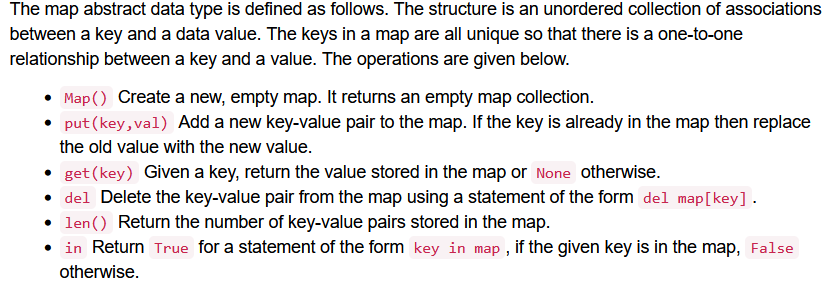

## Sorting Algorithms

### Bubble Sort

Multiple passes throught a list: compares adjacent items and exchange those who are out of order. Each iteration puts the next largest value in its proper place. Each item "bubles" up to the location where it belongs.

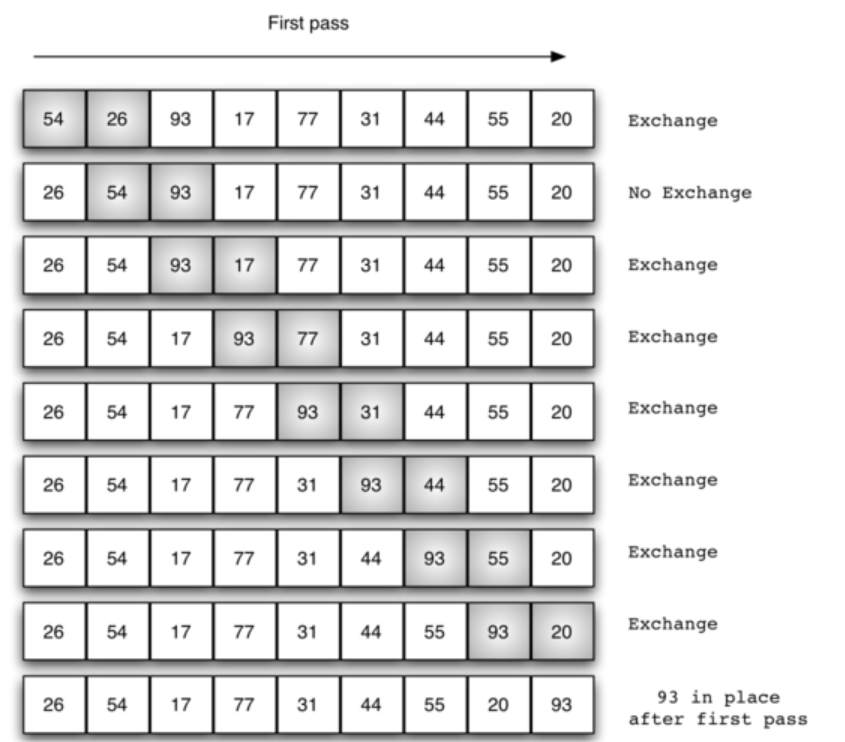 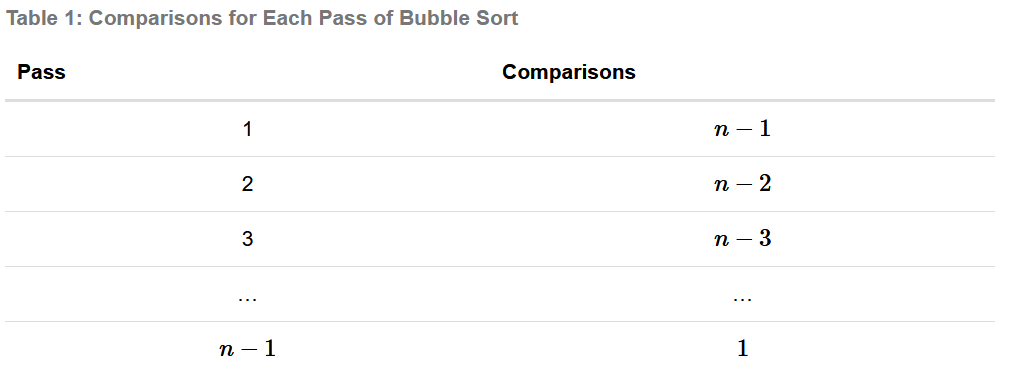

So bubble sort is O(n²). Bubble sort is one of the worst sorting algorithms because it has to constantly exchange elements before the final position is found, which is inneficient

###  Selection Sort

Improves bubble sort by making only one exchange per pass through the list 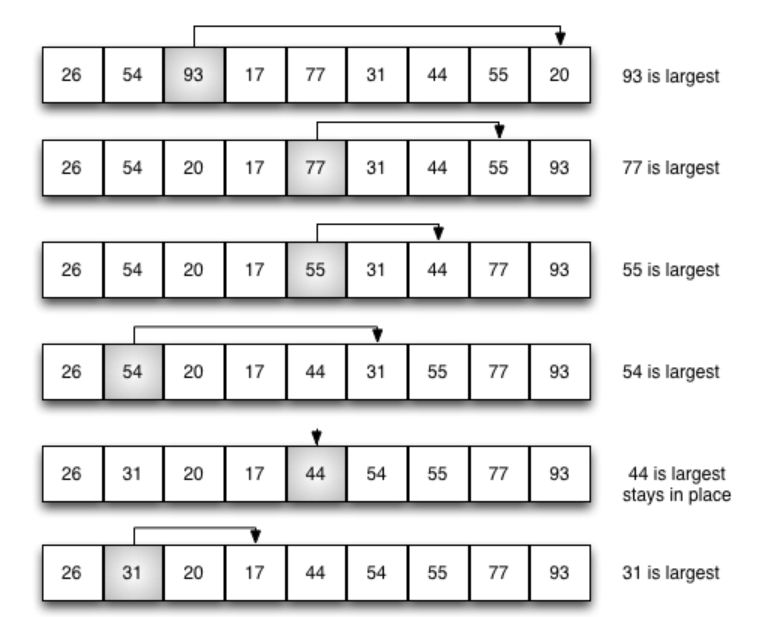

It still has to make the same number of comparisons as bubble sort, so it is O(n²) 

In [94]:
def selection_sort(numlist):
    
    end = len(numlist)-1
    
    pos_max = 0
    
    while end > 0:
        for i in range(end+1):
            if numlist[i] > pos_max:
                pox_max = i 
        numlist[end], numlist[pos_max] = numlist[pos_max],numlist[end]
        end -= 1

### Insertion Sort

Maintains a sorted sublist

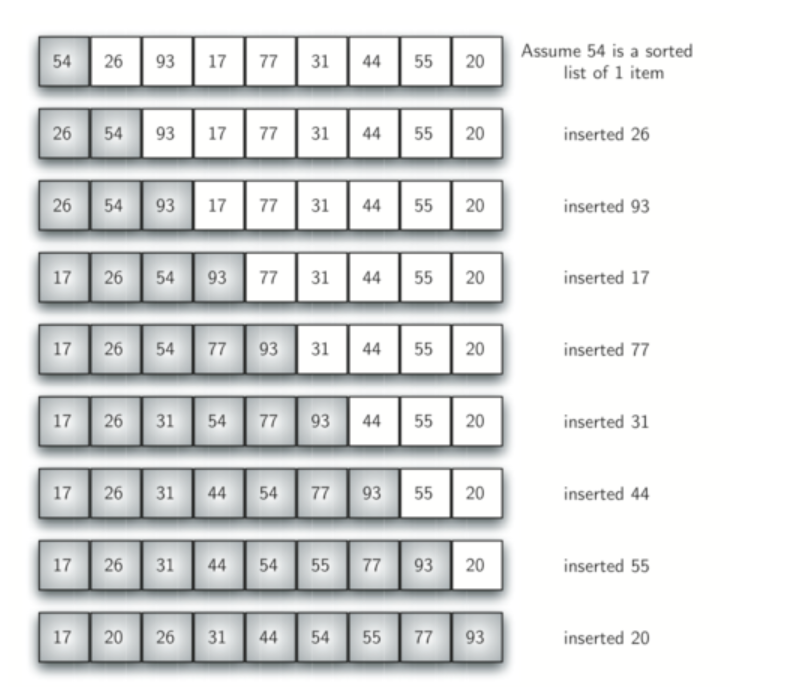

### Shell Sort

Breaks the insertion sort into smaller sublits

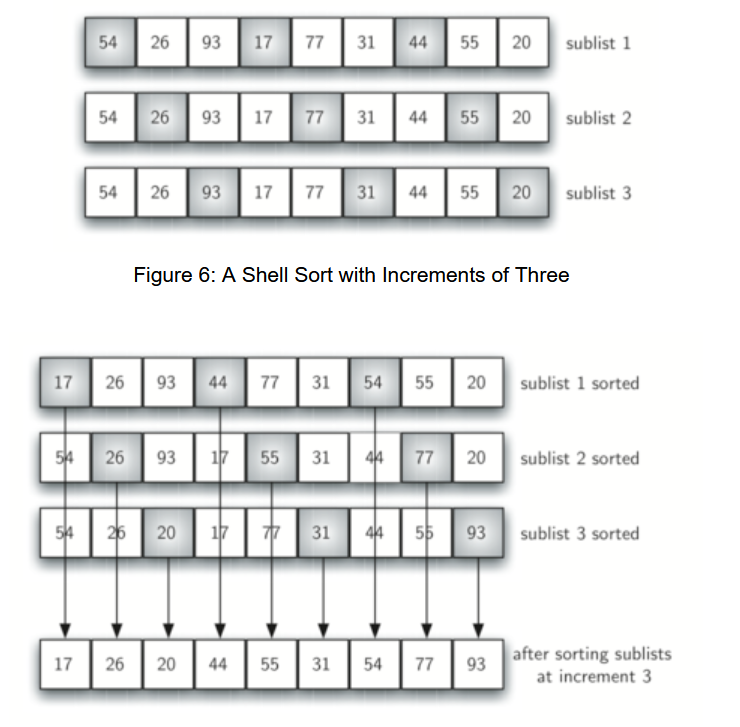

### Merge Sort

Recursive algorithm that keeps splitting the lists in halves. The base case is when the list is empty or has one element. Once the two halves are sorted, perform the merging, taking the two smaller sorted lists and combining them together into a single sorted list

Note that since the list has to be splitted n times, it will take log(n) operations to do so. Also, when we merge each of the sorted sublists, it will take n operations to do so, therefore, merge sort performance is O(n.log(n))


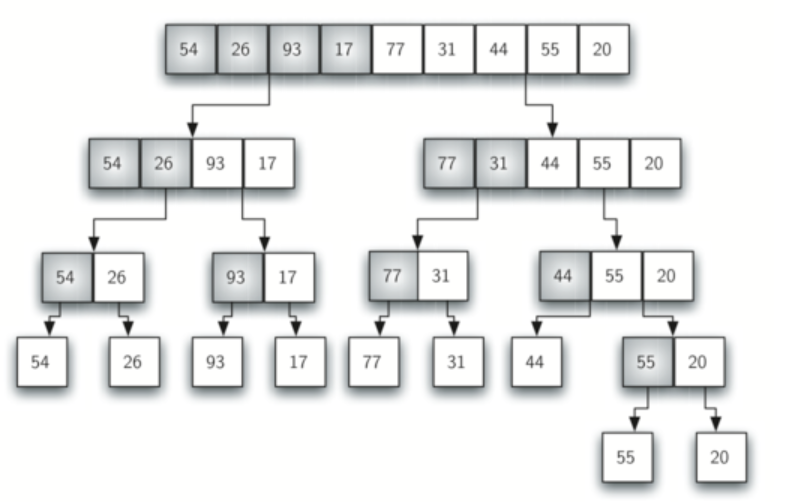 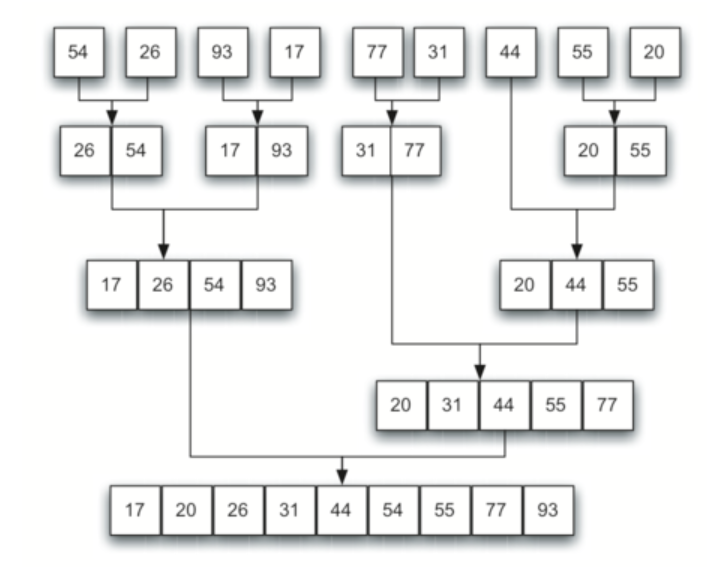

The algorithm starts dividing the list into sublits with half the size. When it gets to a point where the next sublist will have a len less than 1, it starts the merging: by using an starting parameter, we know where at the original list we should start putting the sorted numbers: the most left half of the sublists will start at 0, while the most right half will start at the len(list)-1

In [71]:
def merge_sort(numlist, start, end):
    
    if end - start> 1:
        
        midpoint = (end+start)//2
        
        
        merge_sort(numlist,start,midpoint)
        merge_sort(numlist,midpoint,end)
    
    
        righthalf = numlist[midpoint:end]
        lefthalf = numlist[start:midpoint]
        
        i = 0
        j = 0
        
        k = start
        
        while i < len(lefthalf) and j < len(righthalf):
            
            if lefthalf[i] <= righthalf[j]:
                
                numlist[k] = lefthalf[i]
                i += 1
                k+=1
            else:
                numlist[k] = righthalf[j]
                
                j+= 1
                k+=1
                
        while i < len(lefthalf):
            numlist[k] = lefthalf[i]
        
            i+=1
            k+=1
            
        while j < len(righthalf):    
            numlist[k] = righthalf[j]
            
            j+=1
            k+=1
        
        
        
        

In [56]:
test = random.sample([i for i in range(1,30)],15)

### Quick Sort

Uses the divide and conquer approach again.


We begin selecting a pivot value (which will usually be the first element of the list) 

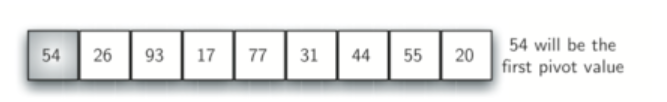

---

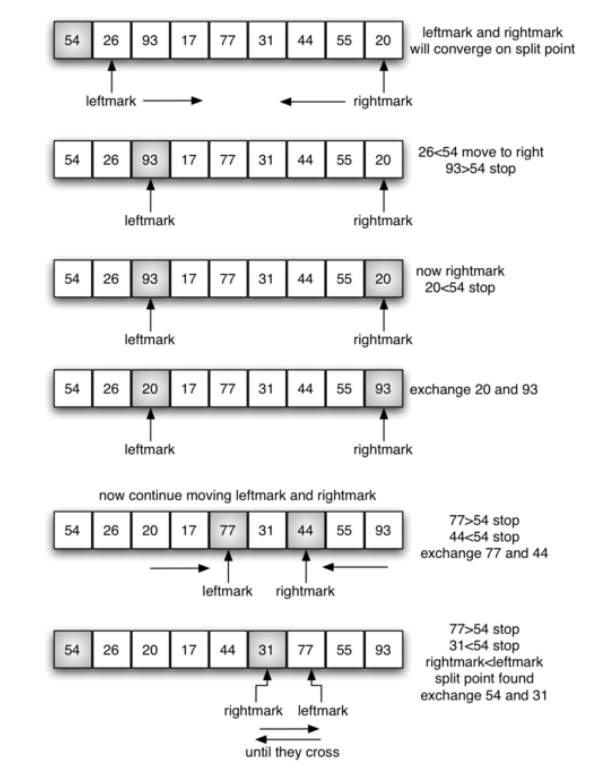

---
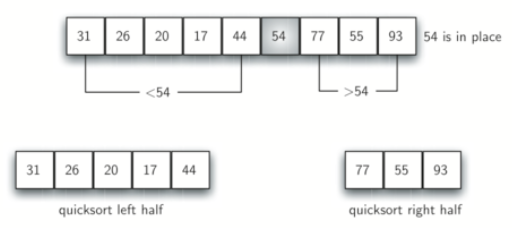

---

In [1]:
import random

In [24]:
def quicksort(numlist, first, last):
    
    if last <= first:
        return
    
    pivotvalue = numlist[first]

    leftmark = first+1
    rightmark = last

    done = False
    while not done:

        while leftmark <= rightmark and numlist[leftmark] <= pivotvalue:
            leftmark = leftmark + 1

        while numlist[rightmark] >= pivotvalue and rightmark >= leftmark:
            rightmark = rightmark -1

        if rightmark < leftmark:
            done = True
        else:
            numlist[leftmark],numlist[rightmark] = numlist[rightmark],numlist[leftmark]
            
    
    numlist[first], numlist[rightmark] = numlist[rightmark],numlist[first]

    quicksort(numlist,first,rightmark-1)
    quicksort(numlist,rightmark+1,last)
    
    
    

In [28]:
import random

In [26]:
quicksort(alist,0,len(alist)-1)

In [30]:
test = random.sample([i for i in range(100)],10)

In [31]:
test

[83, 99, 45, 82, 96, 1, 31, 63, 53, 69]

In [32]:
quicksort(test,0,len(test)-1)

In [33]:
test

[1, 31, 45, 53, 63, 69, 82, 83, 96, 99]

In [14]:


def quicksort(numlist):
        print(numlist)
        runner = 0 
        left_partition = 0
        right_partition = len(numlist) - 1

        while runner <= right_partition:
            if numlist[runner] == 0:
                numlist[runner],numlist[left_partition] = numlist[left_partition], numlist[runner]
                runner += 1
                left_partition +=1 
                print(numlist)
                
            elif numlist[runner] == 1:
                runner += 1
                print(numlist)
            else:
                numlist[runner], numlist[right_partition] = numlist[right_partition],numlist[runner]
                print(numlist)
                runner+=1
                right_partition -= 1









In [15]:
import random

In [16]:
test =[random.randint(0,2) for i in range(10)]

In [17]:
test

[1, 0, 0, 0, 0, 2, 2, 0, 0, 0]

In [18]:
quicksort(test)


[1, 0, 0, 0, 0, 2, 2, 0, 0, 0]
[1, 0, 0, 0, 0, 2, 2, 0, 0, 0]
[0, 1, 0, 0, 0, 2, 2, 0, 0, 0]
[0, 0, 1, 0, 0, 2, 2, 0, 0, 0]
[0, 0, 0, 1, 0, 2, 2, 0, 0, 0]
[0, 0, 0, 0, 1, 2, 2, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 2, 0, 0, 2]
[0, 0, 0, 0, 1, 0, 0, 0, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 1, 2, 2]
